# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd# Импортирую библиотеку pandas

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')# прочтем csv-файл

In [4]:
data.info()# Изучим общую информацию о полученном датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.head(20)# взглянем на первые 20 строчек 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

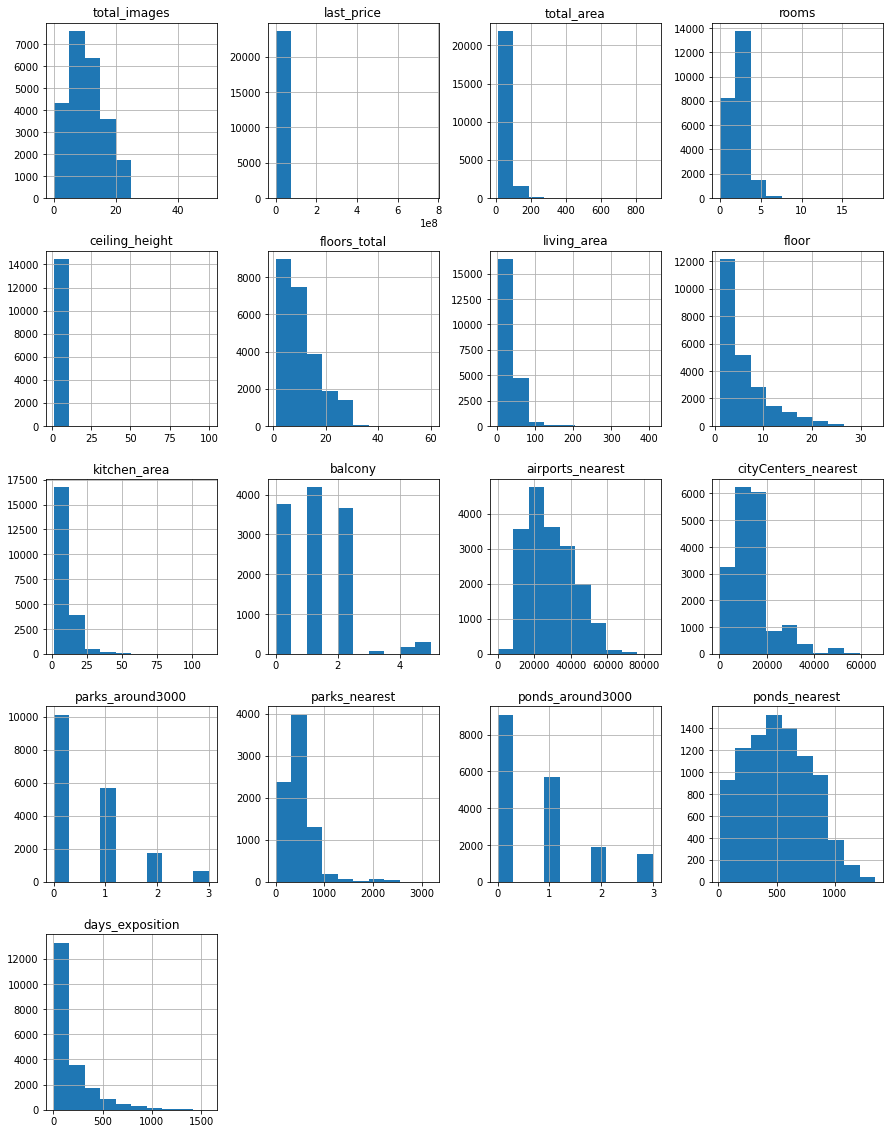

In [7]:
data.hist(figsize=(15, 20));# Построим общую гистограмму

### Предобработка данных

In [8]:
data.isna().sum()# Выведем количество пропущенных значений для каждого столбца

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

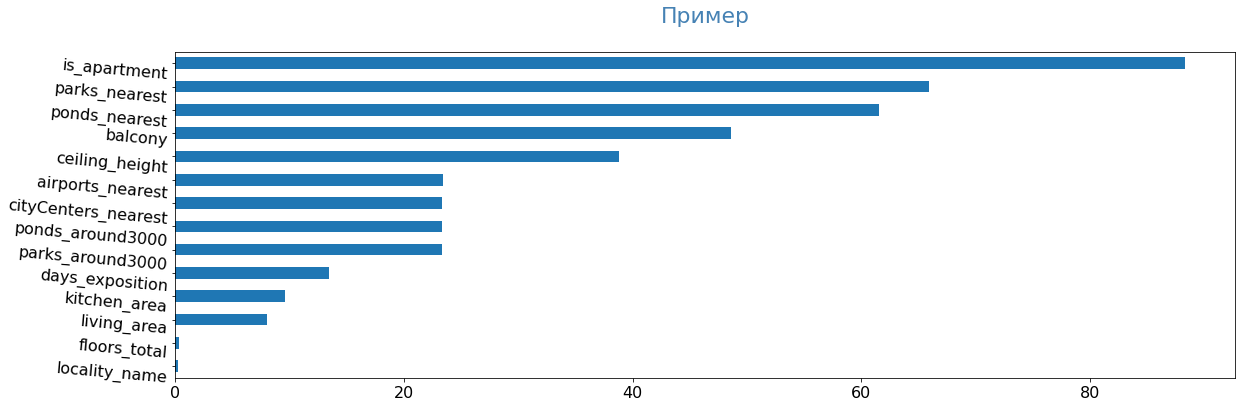

In [10]:
pass_value_barh(data)

In [11]:
ceiling_height_fil = data.groupby('rooms')['ceiling_height'].transform('median')
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_fil)# заполним пропуски в столбце с высотой потолков медиальным значением квартир с таким же количеством комнат

In [12]:
data['balcony'] = data['balcony'].fillna(0)# пропуски в графе балконы заменим на 0

In [13]:
data.loc[(data.total_area*0.9 <= data.living_area + data.kitchen_area), 'kitchen_area'] = (data.total_area * 0.899) - data.living_area

In [14]:
living_area_fil = data.groupby('rooms')['living_area'].transform('median')
data['living_area'] = data['living_area'].fillna(living_area_fil)# заполним пропуски в столбце жилая площадь медиальным значением квартир с таким же количеством комнат

In [15]:
kitchen_area_fil = data.groupby('studio')['kitchen_area'].transform('median')
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area_fil)# заполним пропуски в столбце площадь кухни медиальным значением с сортировкой по показателю студия

In [16]:
data[data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area'])]# проверим нет ли значений привышающих в сумме общую площадь

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
164,6,800000.0,40.3,2018-06-25T00:00:00,2,2.60,3.0,30.50,1,NaN,...,9.0,2.0,поселок городского типа Ефимовский,NaN,NaN,NaN,NaN,NaN,NaN,81.0
195,8,5300000.0,60.0,2016-05-19T00:00:00,3,2.65,9.0,45.00,4,NaN,...,9.0,0.0,Санкт-Петербург,52072.0,17061.0,1.0,1133.0,3.0,239.0,372.0
227,13,2200000.0,47.0,2018-01-12T00:00:00,3,2.34,5.0,45.00,1,NaN,...,9.0,0.0,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.64,NaN,20.75,1,NaN,...,9.0,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
322,6,2000000.0,25.0,2017-02-07T00:00:00,1,2.64,5.0,17.60,5,False,...,9.0,0.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23500,7,2850000.0,29.0,2018-02-11T00:00:00,1,2.64,9.0,17.60,9,NaN,...,9.0,0.0,Санкт-Петербург,26953.0,12051.0,0.0,NaN,0.0,NaN,45.0
23579,7,2350000.0,24.8,2018-06-07T00:00:00,1,2.64,10.0,18.00,2,NaN,...,9.0,0.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,89.0
23592,10,1450000.0,29.0,2017-11-11T00:00:00,0,2.75,9.0,18.00,8,NaN,...,9.0,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0
23601,10,2900000.0,43.4,2018-01-11T00:00:00,2,2.60,5.0,30.50,1,NaN,...,9.0,0.0,Санкт-Петербург,22001.0,14193.0,1.0,202.0,2.0,397.0,45.0


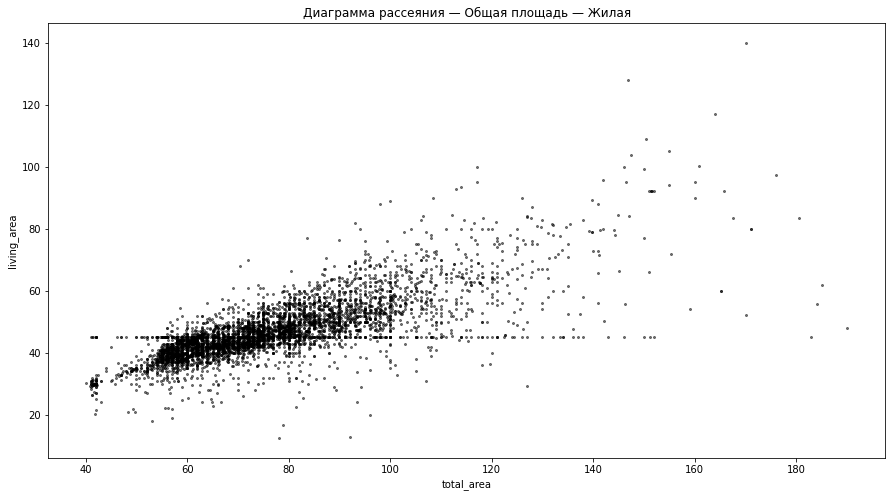

In [17]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'black', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

In [18]:
data.loc[(data.total_area*0.9 <= data.living_area + data.kitchen_area), 'kitchen_area'] = (data.total_area * 0.899) - data.living_area# подредактируем площадь кухни

In [19]:
data[data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area'])]# еще раз проверим на аномалии

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [20]:
data['is_apartment'] = data['is_apartment'].fillna(False)# пропуски в графе апартаменты заменим на False

Пропуски в данных могут быть обусловлены разными факторами. Например  в столбцах 'balcony' и 'is_apartment' пропуск скорее всего сигнализирует, что при заполнении данных продавцы с квартирами не имеющих балкона и не являющимися апартаментами просто не стал ничего указывать.

В столбцах с площадью 'living_area',  'kitchen_area' и столбце с высотой потолков 'ceiling_height' пропуски допущены скорее всего из-за отсутствия под рукой у продавца точных данных в момент заполнения объявления на сайте.

Так же можно предположить, что пропуски в столбцах ‘airports_nearest’, ‘cityCenters_nearest’, ‘parks_around3000’, ‘parks_nearest’, ‘ponds_around3000’, ‘ponds_nearest ‘ появились из-за отсутствия в объявлении точной геолокации.

В столбце ‘days_exposition’ пропуски свидетельствуют о том, что объявление еще актуально и не снято с публикации.




In [21]:
data.dtypes# рассмотрим типы данных в каждом столбце

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')# помеянем тип данных столбца 'first_day_exposition' на datetime 

In [23]:
data['balcony'] = data['balcony'].astype(int)# помеянем тип данных столбца на int

In [24]:
data['floors_total'] = data['floors_total'].fillna(9).astype(int)# помеянем тип данных столбца на int

In [25]:
data['days_exposition'] = data['days_exposition'].fillna(100).astype(int)# помеянем тип данных столбца на int

Для удобства продолжения работы с данными обязательно нужно изменить тип данных двух столбцов: ‘is_apartment’ и ‘first_day_exposition’.

‘is_apartment’ поменялся со значения object на bool сам после замены пропусков на False.
‘first_day_exposition’ через метод to_datetime нужно привести к datetime

In [26]:
data['locality_name'].unique()# выведем на экран и проанализируем оригинальные названия населенных пунктов

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [27]:
data['locality_name'].value_counts()# посчитаем количество оригинальных названий

Санкт-Петербург               15721
посёлок Мурино                  522
посёлок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
деревня Пустынка                  1
деревня Малая Романовка           1
деревня Реброво                   1
садовое товарищество Садко        1
деревня Котлы                     1
Name: locality_name, Length: 364, dtype: int64

In [28]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')# уберем дубликаты по нескольким фильтрам 

In [29]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')# уберем дубликаты по нескольким фильтрам

In [30]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')# уберем дубликаты по нескольким фильтрам

In [31]:
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок')# уберем дубликаты по нескольким фильтрам

In [32]:
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')# уберем дубликаты по нескольким фильтрам

In [33]:
data['locality_name'].value_counts()# проверим насколько уменьшился список. с 364 до 320 позиций. Минус 44 неявных дубликата

Санкт-Петербург                    15721
поселок Мурино                       556
поселок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Свирьстрой                     1
поселок Лужайка                        1
поселок Платформа 69-й километр        1
поселок Форт Красная Горка             1
деревня Котлы                          1
Name: locality_name, Length: 320, dtype: int64

In [34]:
# check
data.locality_name.nunique()

320

In [35]:
data['ceiling_height'].describe()# посмотрим информацию по значениям высоты потолка


count    23698.000000
mean         2.722539
std          0.989714
min          1.000000
25%          2.600000
50%          2.640000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

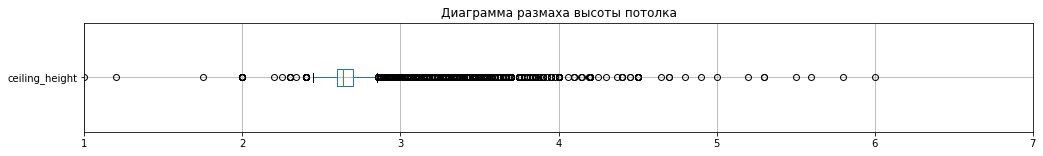

In [36]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['ceiling_height']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха высоты потолка')
ax.set_xlim(1, 7);

In [37]:
data['ceiling_height'].unique()# теперь посмотрим все оригинальные значения и проанализируем их

array([  2.7 ,   2.64,   2.6 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,
         3.05,   2.75,   2.8 ,   2.9 ,   2.55,   3.1 ,   3.  ,   3.2 ,
         2.61,   3.25,   3.45,   2.77,   2.85,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.38,   3.13,   3.8 ,   3.15,   3.42,
         3.55,   3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,
         5.3 ,   5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,
         3.53,   2.83,   4.7 ,   2.4 ,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [38]:
data['ceiling_height'] = data['ceiling_height'].replace(27.5, 2.75)# внесем корректировки в некоторые данные
data['ceiling_height'] = data['ceiling_height'].replace(32, 3.2)
data['ceiling_height'] = data['ceiling_height'].replace(27, 2.7)
data['ceiling_height'] = data['ceiling_height'].replace(26, 2.6)
data['ceiling_height'] = data['ceiling_height'].replace(22.6, 2.26)
data['ceiling_height'] = data['ceiling_height'].replace(25, 2.5)
data['ceiling_height'] = data['ceiling_height'].replace(24, 2.4)
data['ceiling_height'] = data['ceiling_height'].replace(20, 2)

In [39]:
data = data.query('ceiling_height < 4')# отсечем заведомо ложные значения по высоте потолка
data = data.query('ceiling_height > 2')# отсечем заведомо ложные значения по высоте потолка

In [40]:
data['rooms'].describe()# посмотрим информацию по количеству комнат

count    23591.000000
mean         2.066212
std          1.068422
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

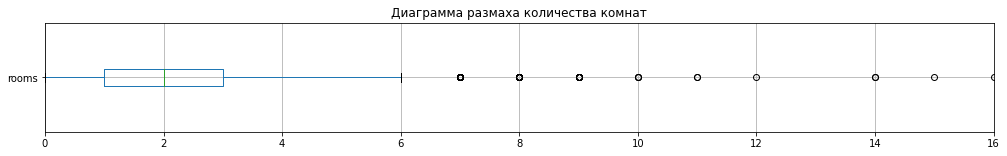

In [41]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['rooms']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха количества комнат')
ax.set_xlim(0, 16);

In [42]:
data = data.query('rooms < 8')# отсечем заведомо ложные значения по высоте потолка
data = data.query('rooms > 0.99')# отсечем заведомо ложные значения по высоте потолка

In [43]:
data['total_area'].describe()# посмотрим информацию по значениям общей площади

count    23366.000000
mean        60.033516
std         33.334063
min         12.000000
25%         40.100000
50%         52.000000
75%         69.700000
max        631.200000
Name: total_area, dtype: float64

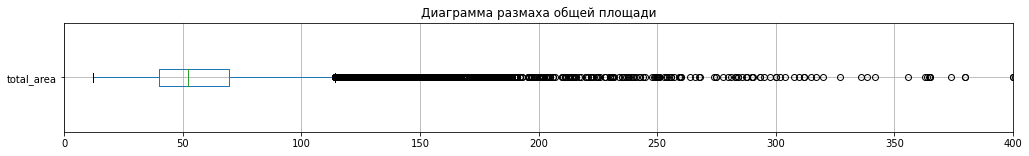

In [44]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха общей площади')
ax.set_xlim(0, 400);

In [45]:
data = data.query('total_area < 275')# отсечем заведомо ложные значения по жилой площади
data = data.query('total_area > 20')# отсечем заведомо ложные значения по жилой площади

In [46]:
data['living_area'].describe()# посмотрим информацию по значениям жилой площади

count    23279.000000
mean        33.729551
std         18.658855
min          2.000000
25%         18.500000
50%         30.400000
75%         42.500000
max        200.000000
Name: living_area, dtype: float64

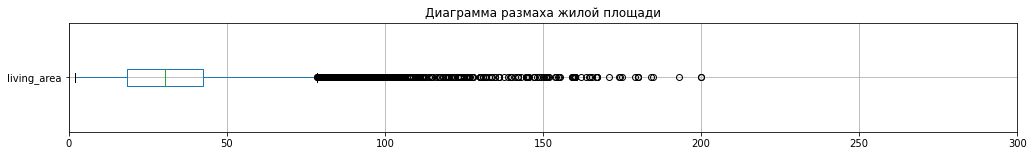

In [47]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['living_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха жилой площади')
ax.set_xlim(0, 300);

In [48]:
data = data.query('living_area < 175')# отсечем заведомо ложные значения по жилой площади
data = data.query('living_area > 10')# отсечем заведомо ложные значения по жилой площади

In [49]:
data['kitchen_area'].describe()# посмотрим информацию по значениям площади кухни

count    23207.000000
mean        10.155745
std          5.384393
min        -54.560600
25%          7.000000
50%          9.000000
75%         11.300000
max        107.000000
Name: kitchen_area, dtype: float64

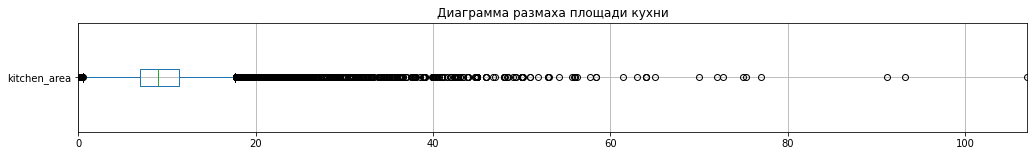

In [50]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['kitchen_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха площади кухни')
ax.set_xlim(0, 107);

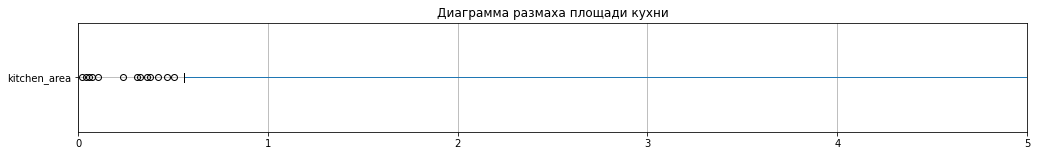

In [51]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['kitchen_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха площади кухни')
ax.set_xlim(0, 5);

In [52]:
data = data.query('kitchen_area < 40')# отсечем заведомо ложные значения по площади кухни
data = data.query('kitchen_area >= 1')# отсечем заведомо ложные значения по площади кухни

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23005 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23005 non-null  int64         
 1   last_price            23005 non-null  float64       
 2   total_area            23005 non-null  float64       
 3   first_day_exposition  23005 non-null  datetime64[ns]
 4   rooms                 23005 non-null  int64         
 5   ceiling_height        23005 non-null  float64       
 6   floors_total          23005 non-null  int64         
 7   living_area           23005 non-null  float64       
 8   floor                 23005 non-null  int64         
 9   is_apartment          23005 non-null  bool          
 10  studio                23005 non-null  bool          
 11  open_plan             23005 non-null  bool          
 12  kitchen_area          23005 non-null  float64       
 13  balcony         

In [54]:
data['days_exposition'].describe()# посмотрим информацию по дням размещения

count    23005.000000
mean       169.930450
std        205.787527
min          1.000000
25%         45.000000
50%        100.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

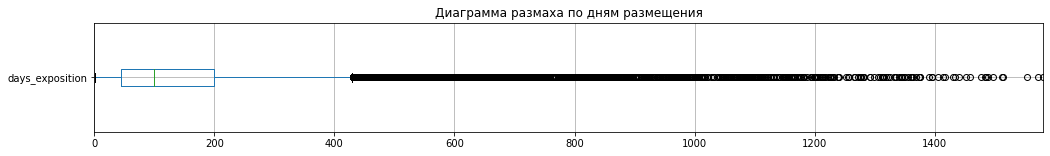

In [55]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['days_exposition']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха по дням размещения')
ax.set_xlim(0, 1580);

In [56]:
data = data.query('days_exposition < 1350')# отсечем заведомо ложные значения
data = data.query('days_exposition > 2')# отсечем заведомо ложные значения

In [57]:
data['last_price'].describe()# посмотрим информацию по финальной цене

count    2.297000e+04
mean     6.063808e+06
std      6.270096e+06
min      4.300000e+05
25%      3.450000e+06
50%      4.630000e+06
75%      6.700000e+06
max      2.892384e+08
Name: last_price, dtype: float64

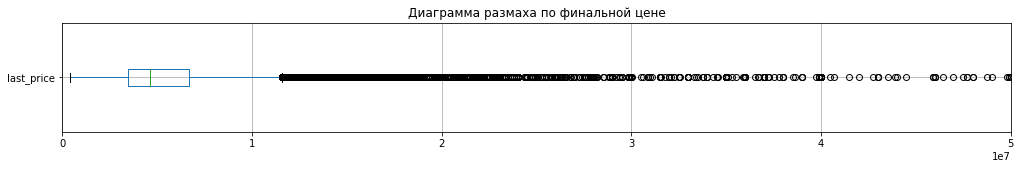

In [58]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['last_price']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха по финальной цене')
ax.set_xlim(0, 50000000);

In [59]:
data['last_price'].sort_values()# проверим нет ли аномально низких значений на нижней границе

14911       430000.0
17456       430000.0
16274       440000.0
16219       450000.0
9581        450000.0
            ...     
13864    130000000.0
12674    140000000.0
2536     159984000.0
19155    160000000.0
22831    289238400.0
Name: last_price, Length: 22970, dtype: float64

In [60]:
data = data.query('last_price < 30000000')# отсечем заведомо ложные значения по финальной стоимости

In [61]:
data['floors_total'].describe()# посмотрим информацию по количеству этажей в здании

count    22773.000000
mean        10.691652
std          6.580084
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

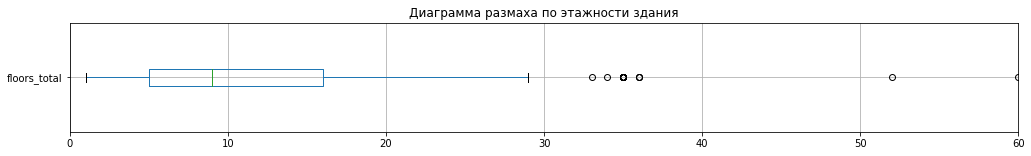

In [62]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['floors_total']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха по этажности здания')
ax.set_xlim(0, 60);

In [63]:
data = data.query('floors_total < 35')# отсечем заведомо ложные значения по финальной стоимости
data = data.query('floors_total > 1')# отсечем заведомо ложные значения по финальной стоимости

По проанализированным данным можно сделать вывод, что квартир больше всего продается в Санкт – Петербурге, при заполнении объявления встречаются разночтения по написанию буквы ё, а также ошибки с установкой точки при написании высоты потолка.
В столбцах с площадью помещения и кухни встречаются как аномально высокие показатели, которые хорошо видно на диаграмме размаха, так и аномально низкие.

#### check gap

In [64]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22722 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22722 non-null  int64         
 1   last_price            22722 non-null  float64       
 2   total_area            22722 non-null  float64       
 3   first_day_exposition  22722 non-null  datetime64[ns]
 4   rooms                 22722 non-null  int64         
 5   ceiling_height        22722 non-null  float64       
 6   floors_total          22722 non-null  int64         
 7   living_area           22722 non-null  float64       
 8   floor                 22722 non-null  int64         
 9   is_apartment          22722 non-null  bool          
 10  studio                22722 non-null  bool          
 11  open_plan             22722 non-null  bool          
 12  kitchen_area          22722 non-null  float64       
 13  balcony         

In [65]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,722.00","22,722.00","22,722.00","22,722.00","22,722.00","22,722.00","22,722.00","22,722.00","22,722.00"
min,1.00,20.30,2.20,3.00,"430,000.00",10.08,1.03,1.00,2.00
max,7.00,266.20,3.98,"1,349.00","29,999,000.00",171.00,39.90,32.00,34.00


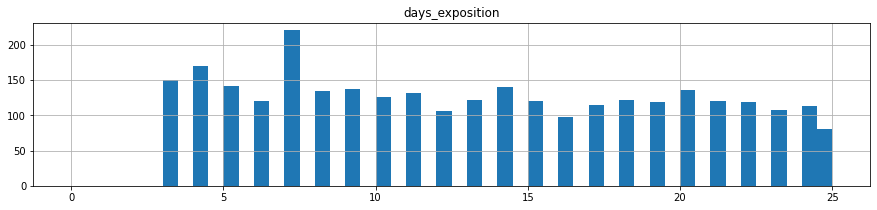

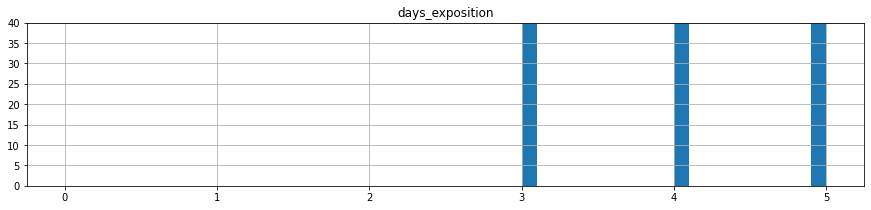

In [66]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,25));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

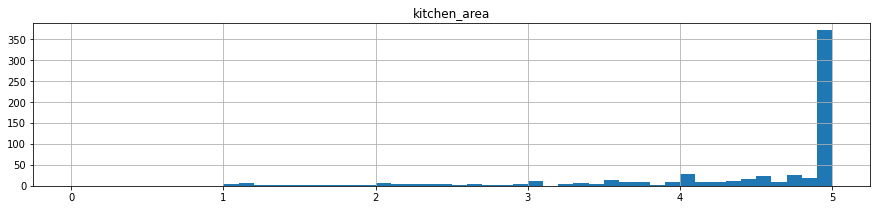

In [67]:
# check
data.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (0,5));

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22722 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22722 non-null  int64         
 1   last_price            22722 non-null  float64       
 2   total_area            22722 non-null  float64       
 3   first_day_exposition  22722 non-null  datetime64[ns]
 4   rooms                 22722 non-null  int64         
 5   ceiling_height        22722 non-null  float64       
 6   floors_total          22722 non-null  int64         
 7   living_area           22722 non-null  float64       
 8   floor                 22722 non-null  int64         
 9   is_apartment          22722 non-null  bool          
 10  studio                22722 non-null  bool          
 11  open_plan             22722 non-null  bool          
 12  kitchen_area          22722 non-null  float64       
 13  balcony         

In [69]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [70]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


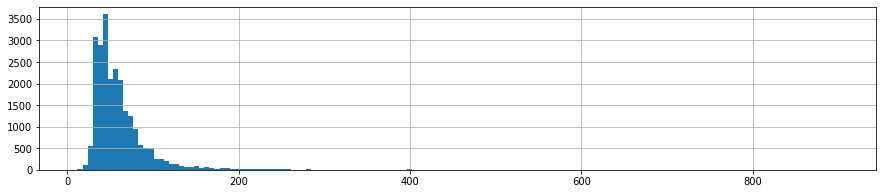

In [71]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

т.е. все квартиры менее 20-ти и более 250-ти квадратных метров можно считать редкостями

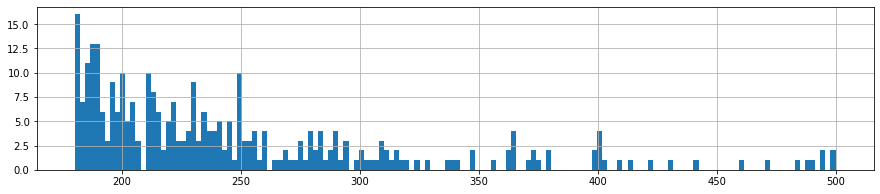

In [72]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

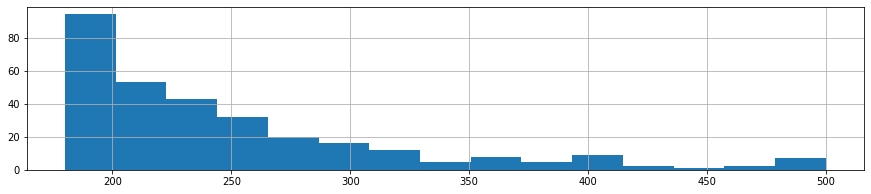

In [73]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

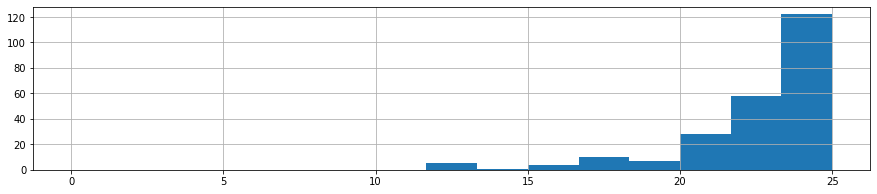

In [74]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [75]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,1.00,22.28,2.40,3.00,"586,326.00",11.00,2.00,1.00,2.00
0.01,1.00,28.00,2.50,4.00,"1,000,000.00",13.70,4.55,1.00,2.00
0.5,2.00,52.00,2.64,100.00,"4,600,000.00",30.10,9.00,4.00,9.00
0.99,5.00,156.56,3.50,"1,001.00","22,000,000.00",95.00,27.90,22.79,26.00
0.9988,7.00,214.00,3.80,"1,271.67","28,430,011.71",144.47,36.27,26.00,27.00


### Посчитайте и добавьте в таблицу новые столбцы

In [76]:
data['price_square_meter'] = data['last_price'] / data['total_area']# добавим столбец со стоимостью квадратного метра

In [77]:
data['weekday'] = data['first_day_exposition'].dt.weekday# добавим столбец дня недели размещения объявления

In [78]:
data['month'] = data['first_day_exposition'].dt.month# добавим столбец месяца размещения объявления

In [79]:
data['year'] = data['first_day_exposition'].dt.year# добавим столбец года размещения объявления

In [80]:
def extreme_floors(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [81]:
data['extreme_floors'] = data.apply(extreme_floors, axis = 1)# добавим столбец с классификацией этажей

In [82]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)# добавим столбец растояния от центра в километрах

### Проведите исследовательский анализ данных

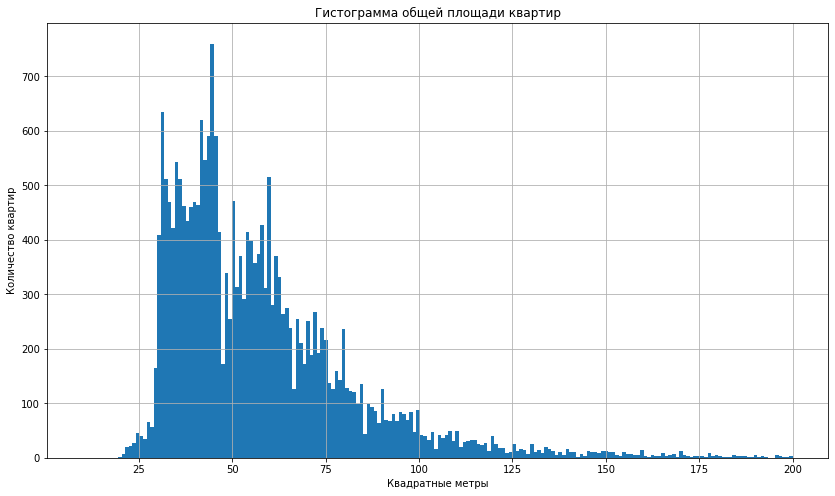

In [83]:
data['total_area'].hist(bins=200, range=(10, 200), figsize=(14, 8))# гистограмма для столбца с общей площадью
plt.title('Гистограмма общей площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

По гистограмме хорошо видно, что больше всего предложений на рынке квартир с площадью около 40м. Так же четко вырисовываются 3 группы: от 20м до 50м(однокомнатные), от 50м до 65м(двухкомнатные) и от  65м до 80м(трехкомнатные). Такие квартиры значительно преобладают на рынке, предложений больше 80м заметно меньше.


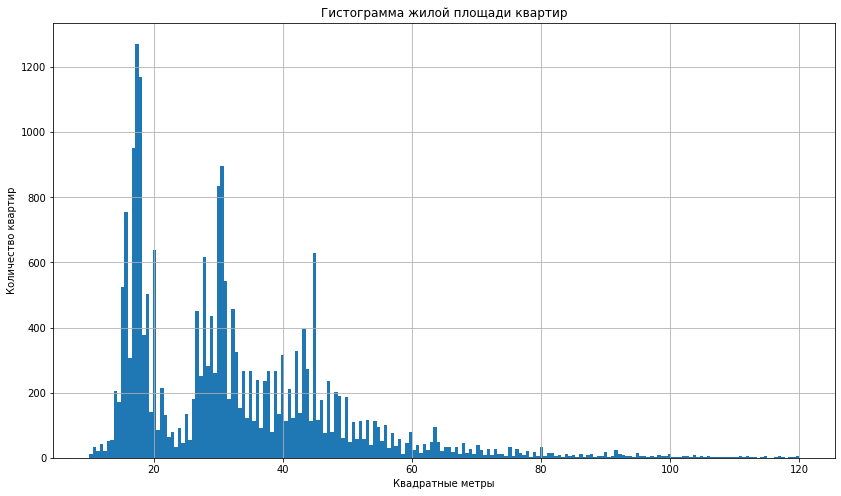

In [84]:
data['living_area'].hist(bins=200, range=(10, 120), figsize=(14, 8))# гистограмма для столбца с жилой площадью
plt.title('Гистограмма жилой площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Гистограмма по жилой площади подверждает наши наблюдения по гистограмме с общей площадью. Явно видны три пика.Больше всего предложений однокомнатных квартир или апартаментов с жилой площадью 18м

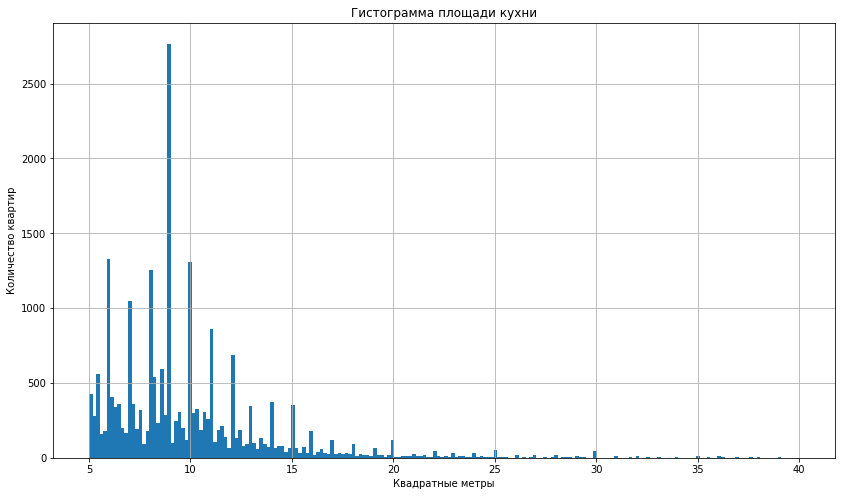

In [85]:
data['kitchen_area'].hist(bins=200, range=(5, 40), figsize=(14, 8))# гистограмма для столбца с площадью кухни
plt.title('Гистограмма площади кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Большенство предложений со стандартной кухней 9м.так же достаточно много предложений с кухнями по 6м, 8м и 10м.


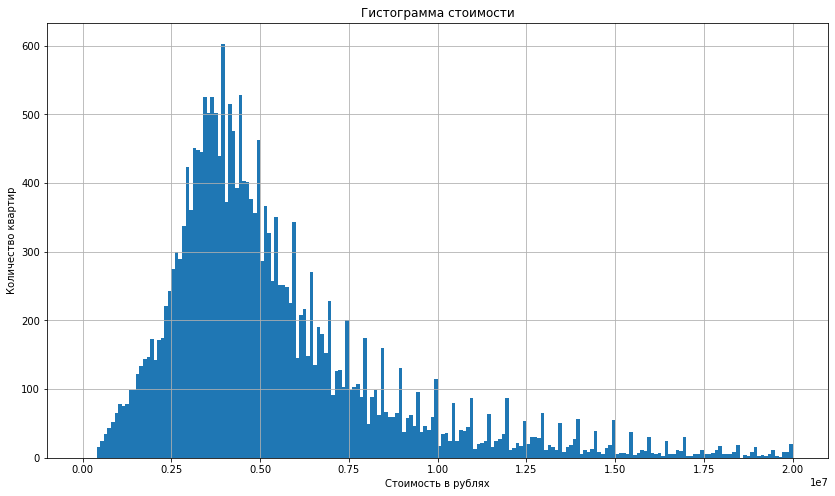

In [86]:
data['last_price'].hist(bins=200, range=(1, 20000000),figsize=(14, 8))# гистограмма для стоимости
plt.title('Гистограмма стоимости')
plt.xlabel('Стоимость в рублях')
plt.ylabel('Количество квартир')
plt.show()

Пик предложений около 4млн рублей. Львиная доля объявлений находится в пределах 10млн

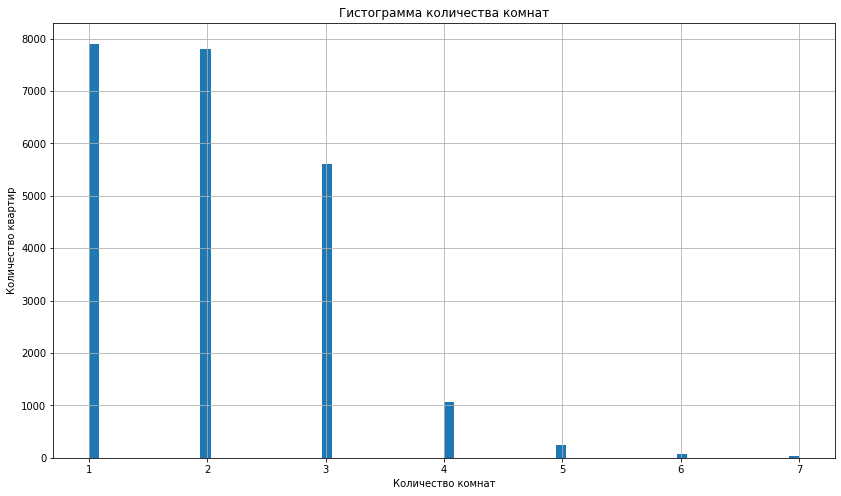

In [87]:
data['rooms'].hist(bins=70,  range=(1, 7),figsize=(14, 8))# гистограмма для количества комнат
plt.title('Гистограмма количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Как и ожидалось больше всего предложений по однокомнатным и двухкомнатным квартирам. Немного по колличеству объявлений отстают трехкомнатные. А от 4 комнат и больше предложений на рынке значительно меньше

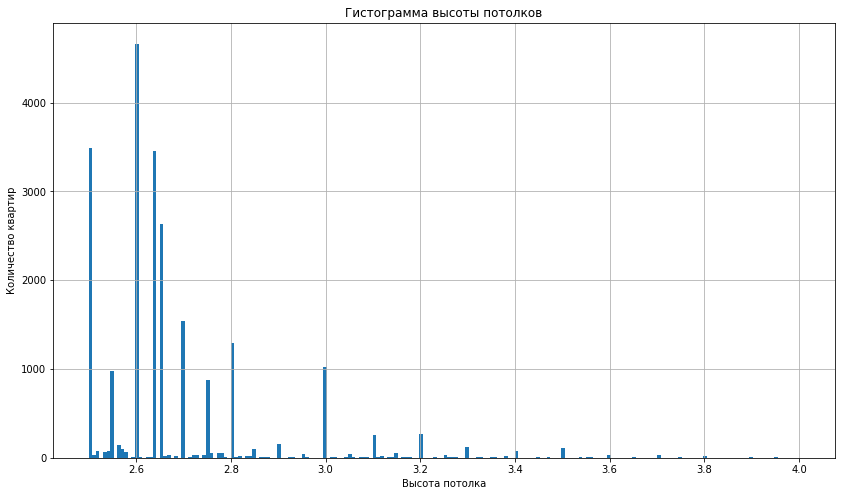

In [88]:
data['ceiling_height'].hist(bins=200,  range=(2.5, 4),figsize=(14, 8))# гистограмма для высоты потолков
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')
plt.show()

Пик приходится на высоту потолков 2.6. А вот потолками выше трех метров могут похвастаться очень немногие.

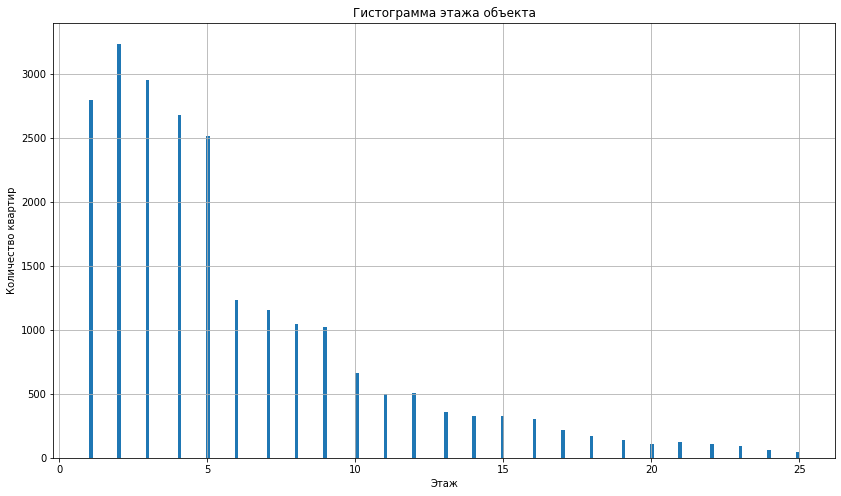

In [89]:
data['floor'].hist(bins=200,  range=(1, 25),figsize=(14, 8))# гистограмма для этажа квартиры
plt.title('Гистограмма этажа объекта')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

Тут мы видим 3 группы. В первую входят впредложения от 1 до 5 этажей, разумееется таких предложений больше, тк часть домов ограничена этажность именно 5. Во вторую группу вхдят предложения от 6 до 9 этажей, что тоже ожидалось, тк 9-ти этажные дома как и 5-ти этажные очень распрастранены в нашей стране.
Ну и в третью группу входят предложения от 10-ти этажей и выше.

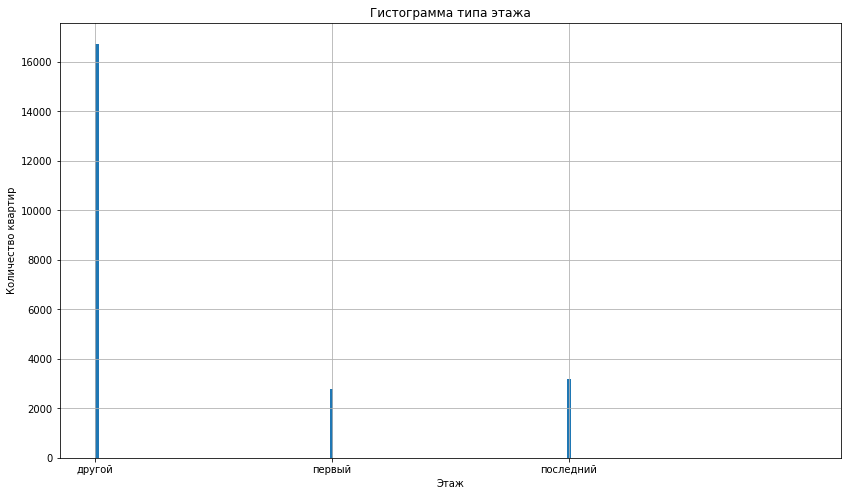

In [90]:
data['extreme_floors'].hist(bins=200,  range=(0, 3),figsize=(14, 8))# гистограмма для типа этажа
plt.title('Гистограмма типа этажа')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

Большенство покупателей при выборе квартиры не хотят рассматривать первый и последний этажи. Поэтому для нас логично создать новый столбец с классификацией, а продавцам приходится сбавлять ценник чтоб продать такие квартиры.

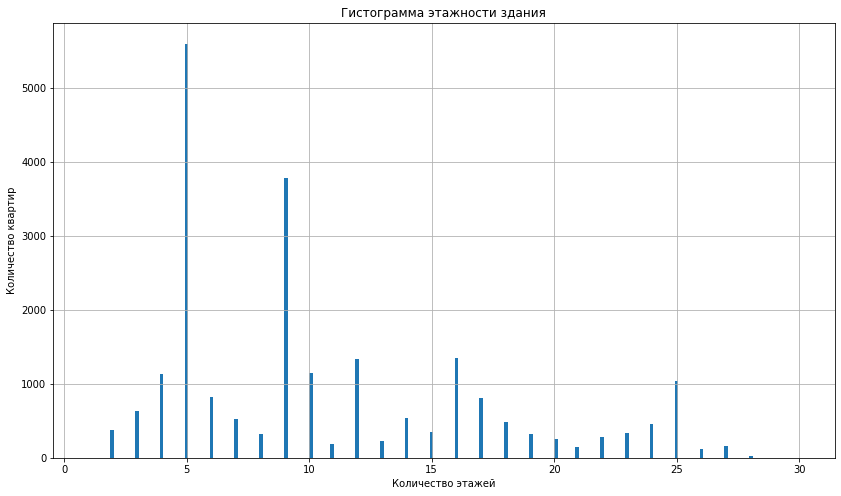

In [91]:
data['floors_total'].hist(bins=200,  range=(1, 30),figsize=(14, 8))# гистограмма для этажности здания
plt.title('Гистограмма этажности здания')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

Эта гистограмма подтверждает наши прошлые выводы: доминирующее положение занимают пятиэтажки, на втором месте девятиэтажки, остальные варианты этажности встречаются значительно реже.

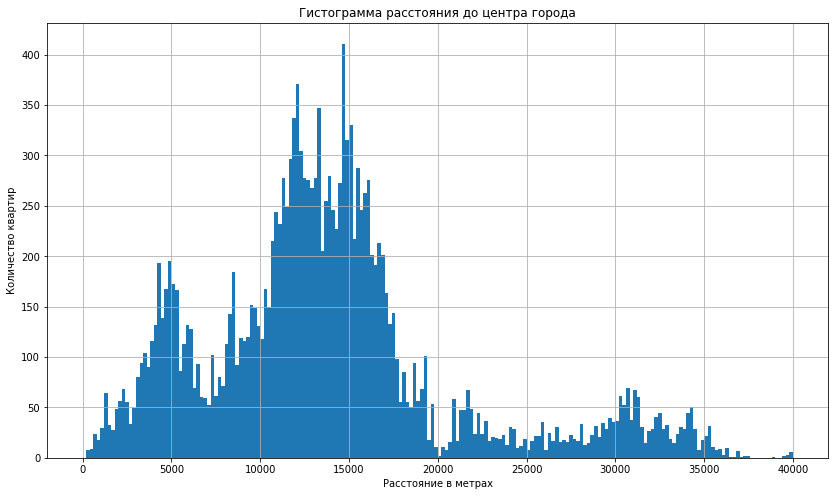

In [92]:
data['cityCenters_nearest'].hist(bins=200,  range=(1, 40000),figsize=(14, 8))# гистограмма для расстояния до центра
plt.title('Гистограмма расстояния до центра города')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show()

Пик гистограммы приходится на отдоленности в 15км от центра.

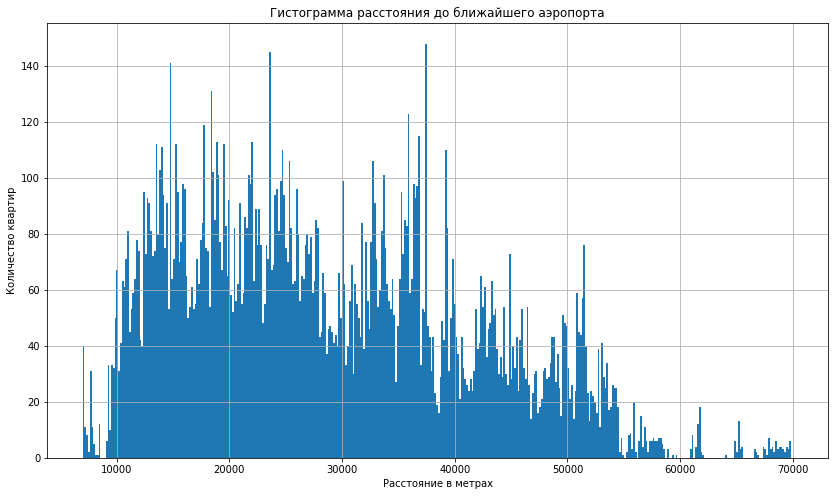

In [93]:
data['airports_nearest'].hist(bins=400,  range=(7000, 70000),figsize=(14, 8))# гистограмма для расстояния до ближайшего аэропорта
plt.title('Гистограмма расстояния до ближайшего аэропорта')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show()

Видно 2 пика. На 24км и 38км, вероятно в этих местах строются новые районы.

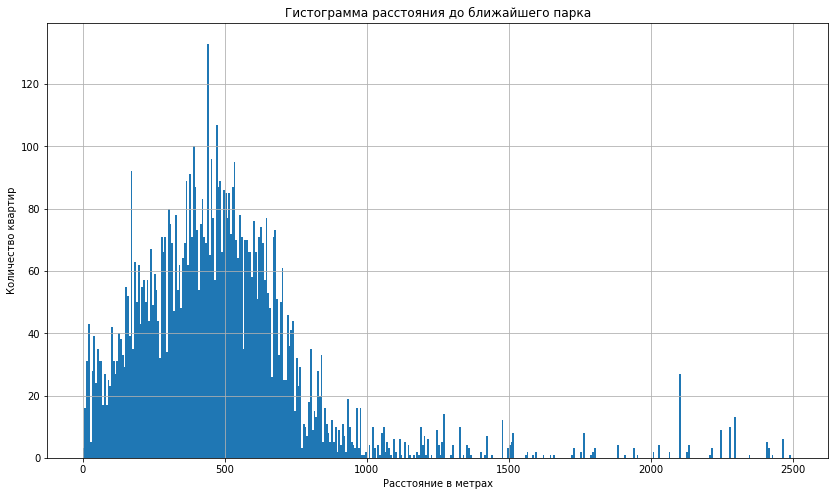

In [94]:
data['parks_nearest'].hist(bins=400,  range=(0, 2500),figsize=(14, 8))# гистограмма для расстояния до ближайшего парка
plt.title('Гистограмма расстояния до ближайшего парка')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show()

Хорошие новости! Почти все квартиры находятся в пределах 1км от парка. А пик приходится и вовсе на 400мм! Что говорит об обустроенности городов парками. Хотя не будем забывать, что именно в этом столбце многие не внесли данные.

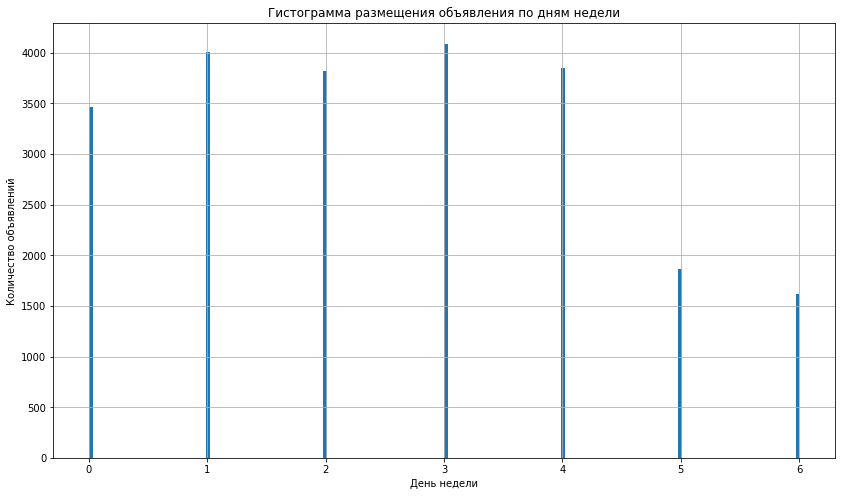

In [95]:
data['weekday'].hist(bins=200,  range=(0, 6),figsize=(14, 8))# гистограмма для дня недели размещения объявления
plt.title('Гистограмма размещения объявления по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')
plt.show()

Показатели в будни практически эдентичны. В выходные объявления размещают менее активно, наверно агенства недвижимости отдыхают.

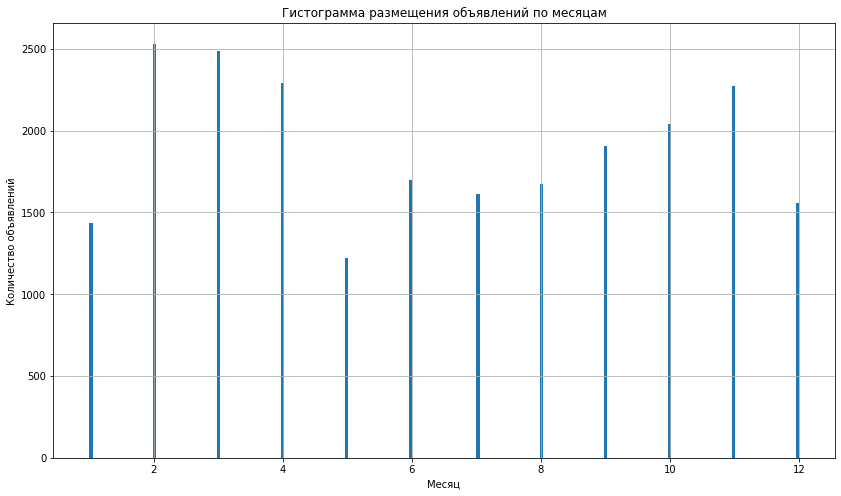

In [96]:
data['month'].hist(bins=200,  range=(1, 12),figsize=(14, 8))# гистограмма для месяца размещения объявления
plt.title('Гистограмма размещения объявлений по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.show()

Можно выделить просадку количества объявлений в январе и мае. Ну это можно понять, новогодние каникулы и майские шашлыки непреодолимая сила! Дела подождут, отдыхать тоже надо.

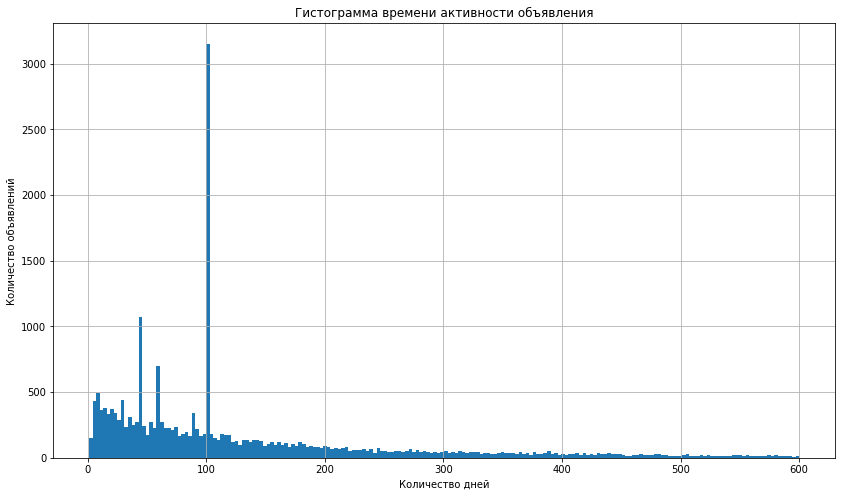

In [97]:
data['days_exposition'].hist(bins=200,  range=(1, 600),figsize=(14, 8))# гистограмма для количества дней актуальности объявления
plt.title('Гистограмма времени активности объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.show()

Гистограмма выдает 3 подозрительных пика. Это примерно 45 дней, 60 и 90 дней.Маловероятно, что все сговорившись продают квартиры тменно на сорок пятый день. Вероятно это рубежы размещения объявления на Яндекс Недвижимости без автоматического проделния. Значит большенство квартир находят своего покупателя в течении 3-х месяцев. Яндекс Недвижимость чудо сервис!

In [98]:
data['days_exposition'].mean()# посчитаем средне колличество дней

167.772555232814

In [99]:
data['days_exposition'].median()# посчитаем медиану дней

100.0

Медиана подтверждает выводы сделанные в предыдущей гистограмме. А среднее показывает, что бывают предложения дорогостоящей  элитной недвижимости на которую не так просто найти покупателя, либо предложения с завышенной ценой относительно рынка, которые тоже не спешат преобретать.

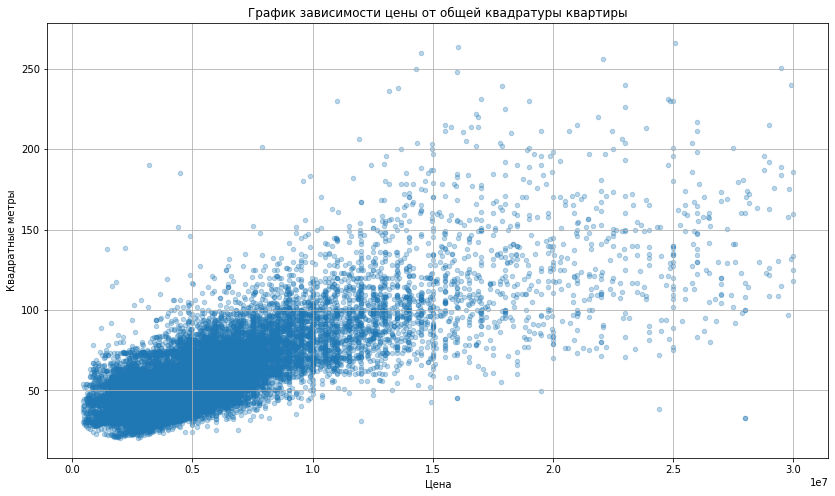

In [100]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3, grid=True, figsize=(14, 8))
plt.title('График зависимости цены от общей квадратуры квартиры')
plt.xlabel('Цена')
plt.ylabel('Квадратные метры')
plt.show()

In [101]:
data['last_price'].corr(data['total_area'])# для наглядности добавим корреляцию Пирсона

0.783167889076337

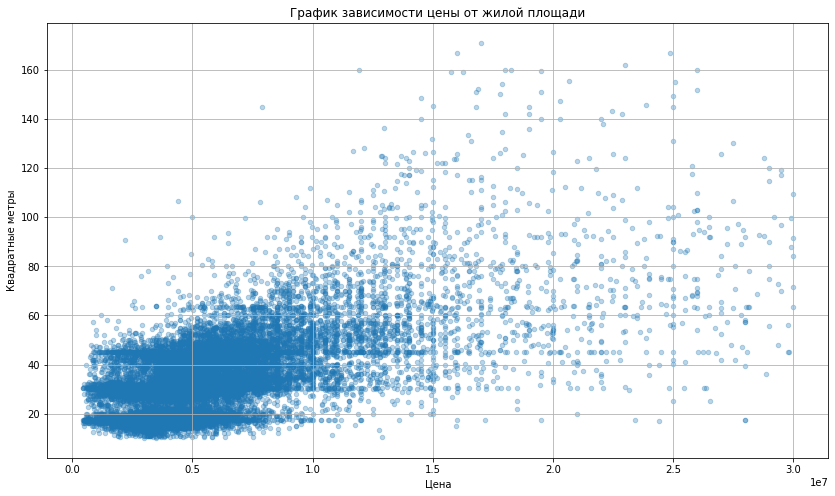

In [102]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3, grid=True, figsize=(14, 8))
plt.title('График зависимости цены от жилой площади')
plt.xlabel('Цена')
plt.ylabel('Квадратные метры')
plt.show()

In [103]:
data['last_price'].corr(data['living_area'])# для наглядности добавим корреляцию Пирсона

0.6596319450922653

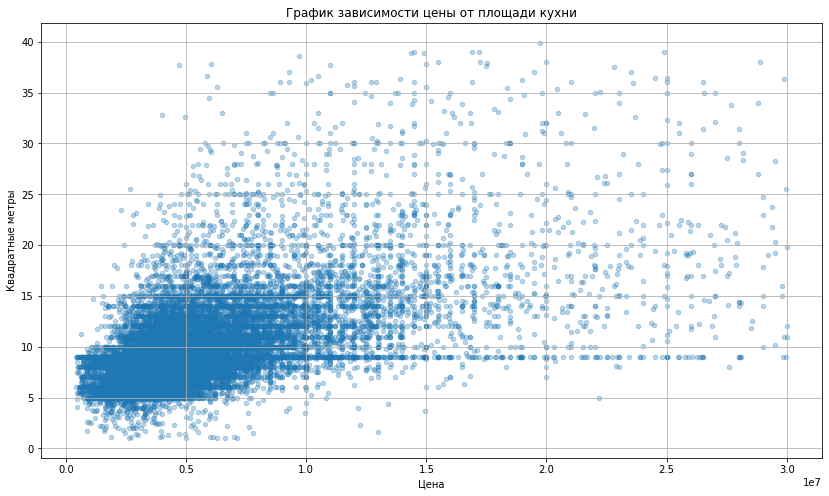

In [104]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3, grid=True, figsize=(14, 8))
plt.title('График зависимости цены от площади кухни')
plt.xlabel('Цена')
plt.ylabel('Квадратные метры')
plt.show()

In [105]:
data['last_price'].corr(data['kitchen_area'])# для наглядности добавим корреляцию Пирсона

0.566241638677472

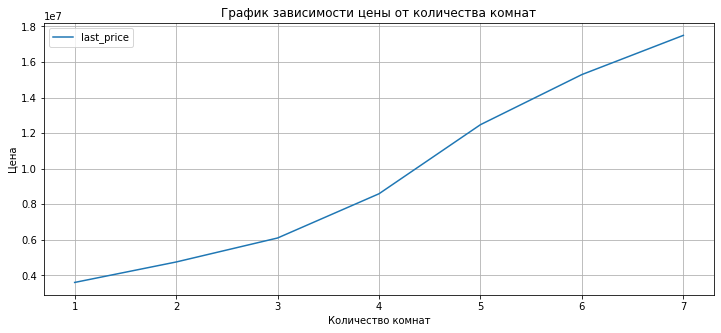

In [106]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(grid=True, figsize=(12,5))
plt.title('График зависимости цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()


In [107]:
data['last_price'].corr(data['rooms'])# для наглядности добавим корреляцию Пирсона

0.5103261340724902

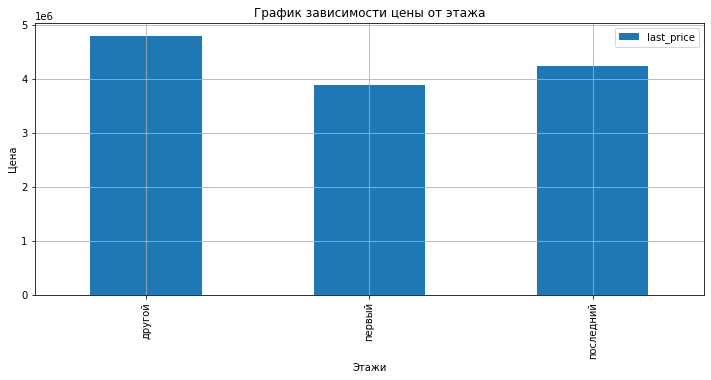

In [108]:
data.pivot_table(index='extreme_floors', values='last_price', aggfunc='median').plot(grid=True, figsize=(12,5), kind = 'bar')
plt.title('График зависимости цены от этажа')
plt.xlabel('Этажи')
plt.ylabel('Цена')
plt.show()


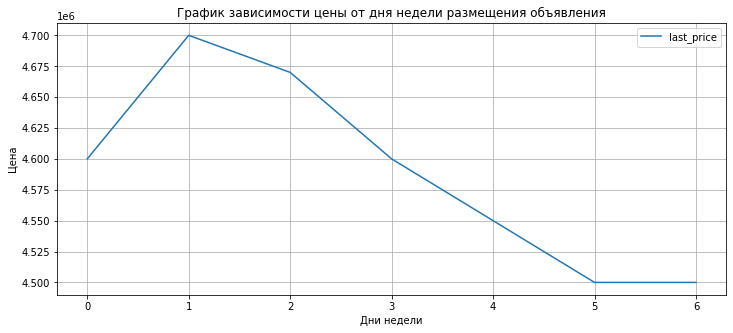

In [109]:
data.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(grid=True, figsize=(12,5))
plt.title('График зависимости цены от дня недели размещения объявления')
plt.xlabel('Дни недели')
plt.ylabel('Цена')
plt.show()


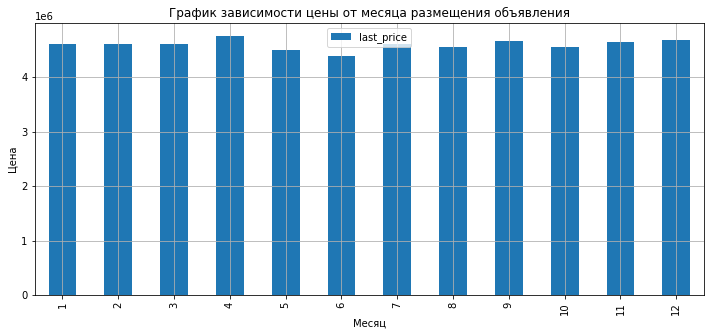

In [110]:
data.pivot_table(index='month', values='last_price', aggfunc='median').plot(grid=True, figsize=(12,5), kind = 'bar')
plt.title('График зависимости цены от месяца размещения объявления')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()


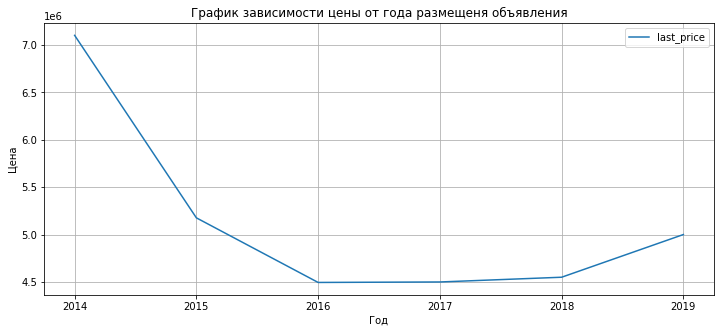

In [111]:
data.pivot_table(index='year', values='last_price', aggfunc='median').plot(grid=True, figsize=(12,5))
plt.title('График зависимости цены от года размещеня объявления')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()


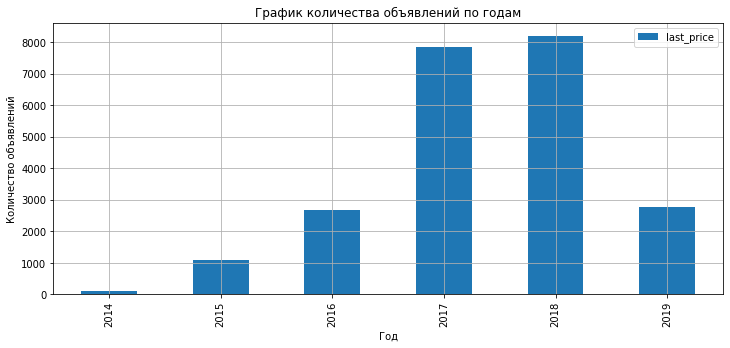

In [112]:
data.pivot_table(index='year', values='last_price', aggfunc='count').plot(grid=True, figsize=(12,5), kind = 'bar')
plt.title('График количества объявлений по годам')
plt.xlabel('Год')
plt.ylabel('Количество объявлений')
plt.show()

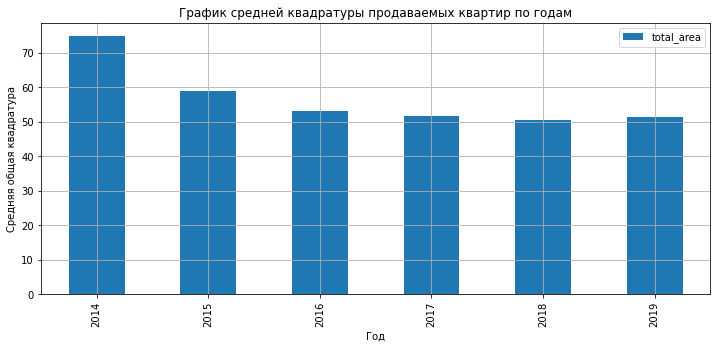

In [113]:
data.pivot_table(index='year', values='total_area', aggfunc='median').plot(grid=True, figsize=(12,5), kind = 'bar')
plt.title('График средней квадратуры продаваемых квартир по годам')
plt.xlabel('Год')
plt.ylabel('Средняя общая квадратура')
plt.show()

По графикам зависимости от цены можно сделать следующие выводы:
Разумеется цена очень сильно зависит от площади. Как жилой так и общей.Разумеется, чем больше площадь, тем больше комнат.
Есть зависимость от класса этажа. квартиры на первом этаже почти на 20% дешевле!
день недели и месяц размещения объявления никак не сказывается на цене объекта недвижимости.
Нужно отметить, что сервис предоставил возможность размещать объявления о продаже недвижимости частным лицам с декабря 2014.Поэтому объявлений за 2014г очень мало.Плюс к этому как мы помним 16 декабря 2014 произошел обвал рубля после повышения ключевой банковской ставки, что наверняка очень резко отразилось на стоимости недвижимости. Учитывая эти факторы полноценно проанализировать данные за 2014 не получится. За 2019 год датасет тоже неполный, но уже включает в себя 4 полных месяца.
Видно как с 2015 к 2019 снизилась средняя квадратура продаваемых квартир с 60м до 51м, видимо сказывается тенденция к увеличению предложений о покупке аппартаментов.
Так же видно как со временем увеличивается колличество объявлений, что может свидетельствовать о растущем рынке, либо о растущей популярности сервиса.Либо и о том и о другом.
Для анализа цены нужно проводить дополнительный, более глубокий анализ.

In [114]:
data['locality_name'].value_counts().head(10)# найдем 10 населенных пункта с наибольшим количеством объявлений

Санкт-Петербург      14963
поселок Мурино         519
поселок Шушары         435
Всеволожск             382
Пушкин                 354
Колпино                337
поселок Парголово      320
Гатчина                304
деревня Кудрово        279
Выборг                 232
Name: locality_name, dtype: int64

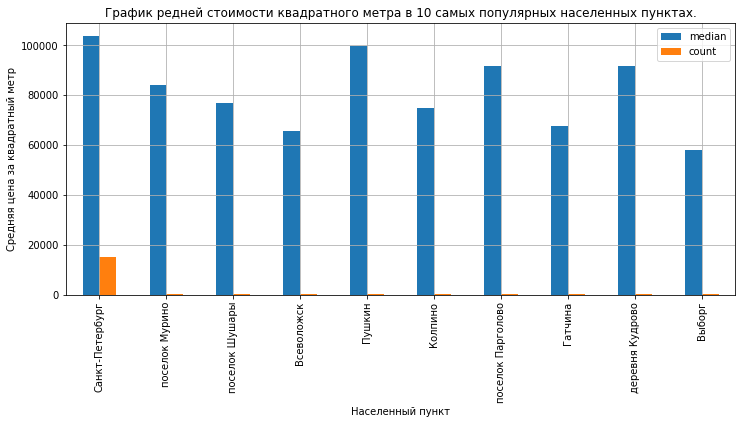

In [115]:
data_ten_set = data.groupby('locality_name')['price_square_meter'].agg({'count', 'median'}).sort_values(by='count', ascending = False).head(10)
round(data_ten_set).plot(grid=True, figsize=(12,5), kind = 'bar')
plt.title('График редней стоимости квадратного метра в 10 самых популярных населенных пунктах.')
plt.xlabel('Населенный пункт')
plt.ylabel('Средняя цена за квадратный метр')
plt.show()# найдем 10 населенных пункта с наибольшим количеством объявлений и выясним среднюю стоимость квадратного метра

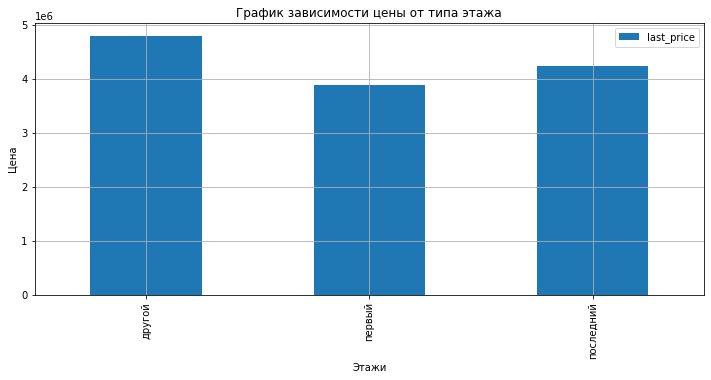

In [116]:
data.pivot_table(index='extreme_floors', values='last_price', aggfunc='median').plot(grid=True, figsize=(12,5), kind = 'bar')
plt.title('График зависимости цены от типа этажа')
plt.xlabel('Этажи')
plt.ylabel('Цена')
plt.show()

Для более корректных показателей применим медиану.
Самая высокая стоимость за квадратный метр в Санкт-Петербурге и городе Пушкин.
А самая доступная недвижимость в Всеволожске, Выборге и Гатчине.

In [117]:
data_SPB = data.query('locality_name == "Санкт-Петербург"')# отфильтруем датафрейм по нужному нам городу

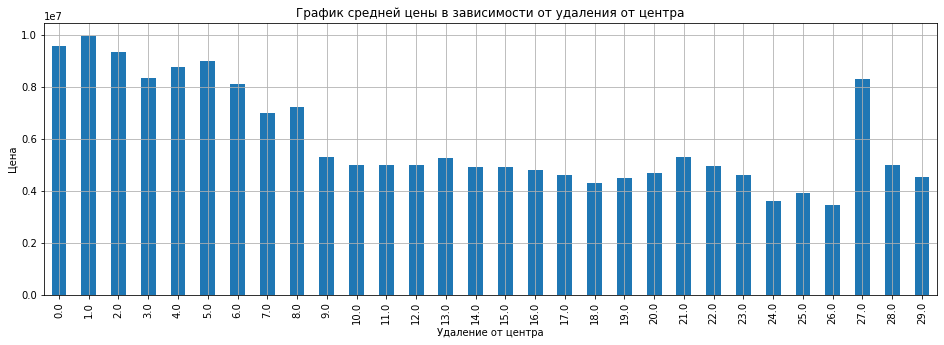

In [118]:
data_SPB.groupby('cityCenters_nearest_km')['last_price'].median().plot(grid=True, kind='bar', figsize=(16,5))
plt.title('График средней цены в зависимости от удаления от центра')
plt.xlabel('Удаление от центра')
plt.ylabel('Цена')
plt.show()

In [119]:
data_SPB_27 = data_SPB.query('cityCenters_nearest_km == 27') # Посмотрим подробней на анамалию на 27км
data_SPB_27

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,extreme_floors,cityCenters_nearest_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496.0,0.0,NaN,128,193918.918919,1,11,2017,другой,27.0
5961,6,2250000.0,32.0,2018-02-27,1,2.64,2,16.5,2,False,...,NaN,0.0,NaN,178,70312.500000,1,2,2018,последний,27.0


In [120]:
data_SPB_3 = data_SPB.query('cityCenters_nearest_km == 3') # Посмотрим подробней на выборку по 3км

In [121]:
data_SPB_5 = data_SPB.query('cityCenters_nearest_km == 5') # Посмотрим подробней на выборку по 5км

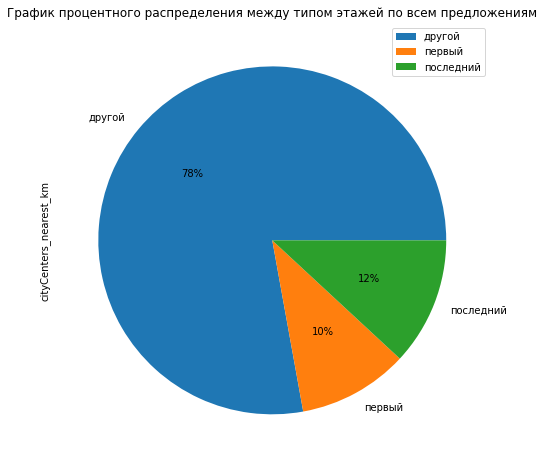

In [122]:
data_SPB.groupby(['extreme_floors']).count().plot(kind='pie', y='cityCenters_nearest_km', autopct='%1.0f%%', figsize=(8,8));
plt.title('График процентного распределения между типом этажей по всем предложениям')
plt.show()

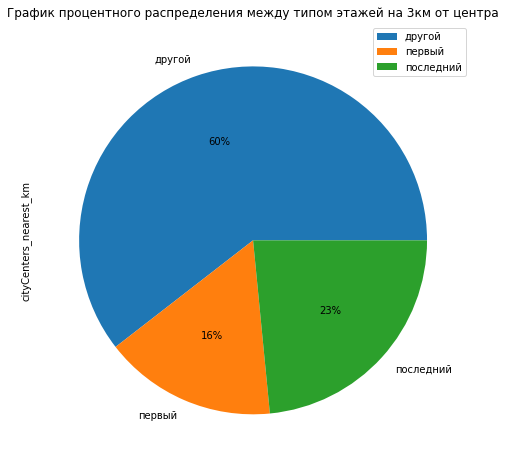

In [123]:
data_SPB_3.groupby(['extreme_floors']).count().plot(kind='pie', y='cityCenters_nearest_km', autopct='%1.0f%%', figsize=(8,8));
plt.title('График процентного распределения между типом этажей на 3км от центра')
plt.show()

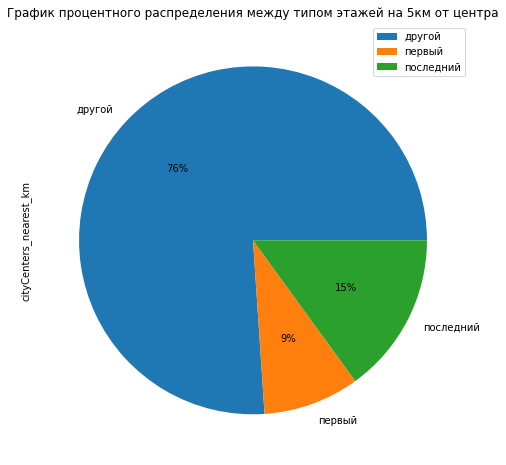

In [124]:
data_SPB_5.groupby(['extreme_floors']).count().plot(kind='pie', y='cityCenters_nearest_km', autopct='%1.0f%%', figsize=(8,8));
plt.title('График процентного распределения между типом этажей на 5км от центра')
plt.show()

Гистограмма показывет, что чем ближе к центру, тем дороже недвижимость. Наблюдается анамалия на 27км, связанная с небольшим колличеством объявлений.Их всего два и одно из них дорогостоящее, что объясняет анамалию.
Так же небольшая анамалия наблюдается в центре на отдалении 3км от центра. Проанализировав данные можно сделать вывод, что это произошло из-за повышенного предложения крайних этажей именно на третьем км. Доля таких квартир составляет аж 39%! Что сильно превышает норму. Например на пяток км таких квартир всего 24%, а в общем объеме данных доля таких квартир составляет и вовсе 22%. Отсюда и анамалия в стоимость, тк мы выяснили ранее, что разница в цене между крайними этажами и другими очень существена.

### Общий вывод

В этом исследовании мы изучали архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.В ходе знакомства с данными была произведена работа по поиску и исправлению аномальных значений, дубликатов, упорядочивание и сортировка.
Выявили несколько закономерностей. Например что стоимость недвижимости напрямую связана с ее метражем и отдаленности от центра, а квартира в одном доме на первом этаже может отличаться на 20% от такой же, но на четвертом этаже.А вот день недели и месяц размещения объявления никак не сказывается на конечной стоимости.
Хоть и с небольшим отрывом, но лидируют на рынке предложения однокомнатных квартир, что для меня лично стало открытием)
Узнали, что пятиэтажки и девятиэтажки преобладают в архектуре города, как и в любом крупном городе России.
К сожалению нет полных данных за 2014г. Было бы очень интересно получить и сравнить полноценные данные в первую очередь по стоимости за 2014, 2020 и не менее сложный 2022 года.